# Đọc dữ liệu lưu trữ cục bộ

In [15]:
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images\\cat.79.jpg', 'cat_dog_images\\cat.8.jpg', 'cat_dog_images\\cat.9.jpg', 'cat_dog_images\\dog.85.jpg', 'cat_dog_images\\dog.86.jpg', 'cat_dog_images\\dog.9.jpg']


Image Size: (346, 499, 3)
Image Size: (345, 461, 3)
Image Size: (425, 320, 3)
Image Size: (243, 224, 3)
Image Size: (137, 139, 3)
Image Size: (500, 368, 3)


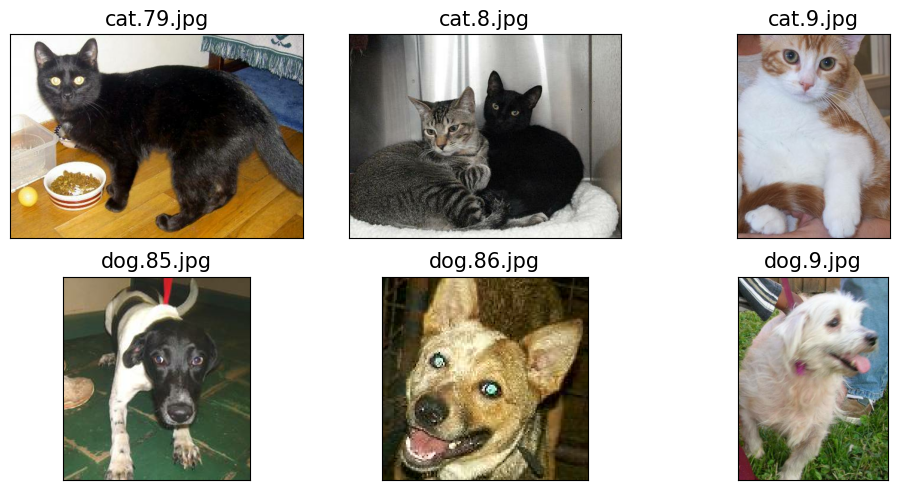

In [21]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf

fig = plt.figure(figsize=(10,5))
for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image Size:', img.shape)
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file),size=15)
plt.tight_layout()
plt.show()

In [23]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [25]:
ds_file_labels = tf.data.Dataset.from_tensor_slices((file_list,labels))
for item in ds_file_labels:
    print(item[0].numpy(), item[1].numpy())

b'cat_dog_images\\cat.79.jpg' 0
b'cat_dog_images\\cat.8.jpg' 0
b'cat_dog_images\\cat.9.jpg' 0
b'cat_dog_images\\dog.85.jpg' 1
b'cat_dog_images\\dog.86.jpg' 1
b'cat_dog_images\\dog.9.jpg' 1


(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 1
(80, 120, 3) 1
(80, 120, 3) 1


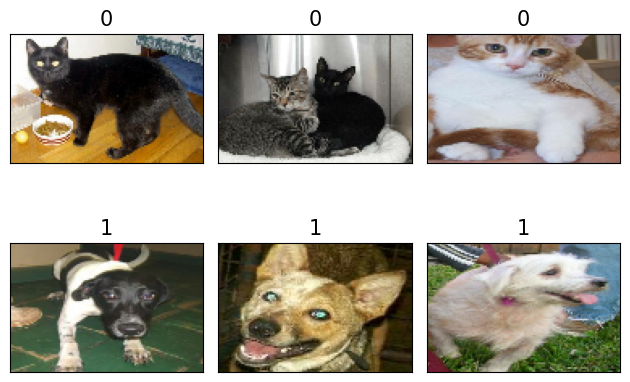

In [29]:
def load_and_preprocess(path,label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    return image, label
img_width, img_height=120,80
ds_images_labels = ds_file_labels.map(load_and_preprocess)
fig = plt.figure(figure=(10,5))
for i, example in enumerate(ds_images_labels):
    print(example[0].shape,example[1].numpy())
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()),size=15)
    
plt.tight_layout()
plt.show()